<a href="https://colab.research.google.com/github/sgovind1994/Discrimination-and-Mental-Health-v.-Unemployment/blob/main/Discrimination_and_Mental_Health_v_Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction:

Unemployment is an issue that has always affected most Americans at some point in their lives, and struggling to find a job is something that can take a toll on a persons physical and mental well-being. In relation, struggling with mental health issues can also make it challenging to keep and find a job. In addition, many people face age and gender discrimination when searching for a job, depending on the type of job they are searching for. These statistics and my findings should be valuable to a lot of mental health professionals, and job agencies hoping to help people with these problems.

Importing Libraries and Mount Drive



In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Mental Health Data.csv to Mental Health Data.csv


In [4]:
import io

df = pd.read_csv(io.BytesIO(uploaded['Mental Health Data.csv']))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   I identify as having a mental illness                         334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,24,35,1,1,0,0,0,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,1,22,0,1,0,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,0,100,0,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,11,0,1,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,33,32,0,1,30,0,0,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


Inital Data Exploration

In [5]:
def series_statistics(column):
  print('statistics for column: {}'.format(column.name))
  print('The max value in the column: {}'.format(column.max()))
  print('The min value in the column: {}'.format(column.min()))
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
  print('The std of the column: {}'.format(column.std()))

series_statistics(df['Annual income (including any social welfare programs) in USD'])

statistics for column: Annual income (including any social welfare programs) in USD
The max value in the column: 100
The min value in the column: 0
The mode value in the column: 0    0
dtype: int64
The median value in the column: 30.0
The mean of the column: 37.4251497005988
The std of the column: 30.651564472831993


In [6]:
df['Annual income (including any social welfare programs) in USD'].describe()

count    334.000000
mean      37.425150
std       30.651564
min        0.000000
25%       12.000000
50%       30.000000
75%       55.000000
max      100.000000
Name: Annual income (including any social welfare programs) in USD, dtype: float64

In [7]:
df[['I am unemployed', 'Depression', 'Anxiety']].corr()

,I am unemployed,Depression,Anxiety
I am unemployed,1.000000,0.170011,0.168219
Depression,0.170011,1.000000,0.586840
Anxiety,0.168219,0.586840,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


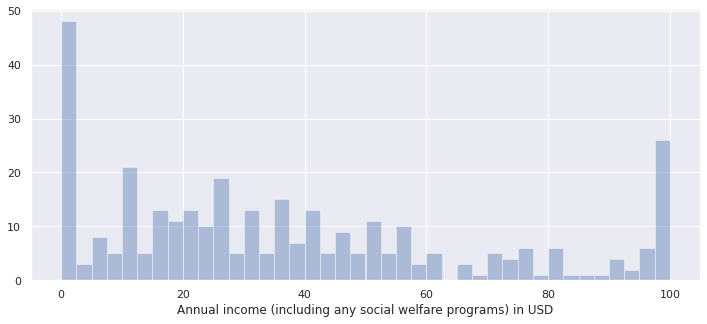

In [8]:
import pandas as pd
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt

df = pd.read_csv ('/content/Mental Health Data.csv')

plt.figure(figsize=(12, 5))
inc_hist = sns.distplot(df['Annual income (including any social welfare programs) in USD'], bins = 40, kde=False)

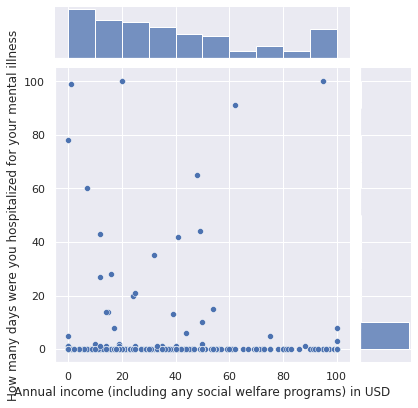

In [9]:
sns.jointplot(x="Annual income (including any social welfare programs) in USD", y="How many days were you hospitalized for your mental illness", data=df)

The initial exploration of the data indicates the following findings:

1) There is a wide distribution of Annual Income 

2) Given the positive correlation coefficient of 0.58, most people who have reported experiencing depression, have also experienced anxiety

3) Since most of these variables are binary, I found that it would be most effective to model my research questions around the following variables: Gender and Age

# Research Question #1: Is there a higher frequency of unemployment for those 45 and older?

Ho: There is no difference in the means of unemployment between those who are under the age of 45 and those who are 45-60

Ha: There is a significant difference in the means of unemployment between those who are under the age of 45 and those who are 45-60



There are 99 entries for those ages 45-60, and 52 entries for those who are significant younger, ages 18-29. I have used these two groups of data to run a two-sample t-test:

In [10]:
people_40 = df.iloc[(df['Age'] == '45-60').values]
people_40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 54 to 329
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    99 non-null     int64  
 1   I identify as having a mental illness                         99 non-null     int64  
 2   Education                                                     99 non-null     object 
 3   I have my own computer separate from a smart phone            99 non-null     int64  
 4   I have been hospitalized before for my mental illness         99 non-null     int64  
 5   How many days were you hospitalized for your mental illness   92 non-null     float64
 6   I am legally disabled                                         99 non-null     int64  
 7   I have my regular access to the internet                      99 non-nu

In [11]:
people_18 = df.iloc[(df['Age'] == '18-29').values]
people_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    52 non-null     int64  
 1   I identify as having a mental illness                         52 non-null     int64  
 2   Education                                                     52 non-null     object 
 3   I have my own computer separate from a smart phone            52 non-null     int64  
 4   I have been hospitalized before for my mental illness         52 non-null     int64  
 5   How many days were you hospitalized for your mental illness   45 non-null     float64
 6   I am legally disabled                                         52 non-null     int64  
 7   I have my regular access to the internet                      52 non-nul

In [12]:
from scipy import stats
stats.ttest_ind(people_40['I am unemployed'], people_18['I am unemployed'])

Ttest_indResult(statistic=-1.7660997659070146, pvalue=0.07942706744313456)

In [13]:
sample_1_n = people_40.shape[0]
sample_2_n = people_18.shape[0]
sample_1_mean = people_40['I am unemployed'].mean()
sample_2_mean = people_18['I am unemployed'].mean()
sample_1_var = people_40['I am unemployed'].var()
sample_2_var = people_18['I am unemployed'].var()

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -0.022034871517248533 and 0.2737831232655003.


Given that the p-value > 0.05, this indicates that there is weak evidence against the null hypothesis, so we should fail to reject the null hyothesis. Therefore, there is no difference in means for those age 45-60 and those age 18-29.

Research Question #2: Is there a higher frequency of unemployment among Females vs. Males?

Ho: There is no difference in the means of unemployment between Males and Females

Ha: There is a significant difference in the means of unemployment between Males and Females

In [14]:
Gender_1 = df.iloc[(df['Gender'] == 'Female').values]
Gender_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 97 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    176 non-null    int64  
 1   I identify as having a mental illness                         176 non-null    int64  
 2   Education                                                     176 non-null    object 
 3   I have my own computer separate from a smart phone            176 non-null    int64  
 4   I have been hospitalized before for my mental illness         176 non-null    int64  
 5   How many days were you hospitalized for your mental illness   153 non-null    float64
 6   I am legally disabled                                         176 non-null    int64  
 7   I have my regular access to the internet                      176 non-

In [15]:
Gender_2 = df.iloc[(df['Gender'] == 'Male').values]
Gender_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 330
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    158 non-null    int64  
 1   I identify as having a mental illness                         158 non-null    int64  
 2   Education                                                     158 non-null    object 
 3   I have my own computer separate from a smart phone            158 non-null    int64  
 4   I have been hospitalized before for my mental illness         158 non-null    int64  
 5   How many days were you hospitalized for your mental illness   144 non-null    float64
 6   I am legally disabled                                         158 non-null    int64  
 7   I have my regular access to the internet                      158 non-n

In [16]:
from scipy import stats
stats.ttest_ind(Gender_1['I am unemployed'], Gender_2['I am unemployed'])

Ttest_indResult(statistic=1.1725821707488733, pvalue=0.24180406495246273)

In [17]:
sample_1_n = Gender_1.shape[0]
sample_2_n = Gender_2.shape[0]
sample_1_mean = Gender_1['I am unemployed'].mean()
sample_2_mean = Gender_2['I am unemployed'].mean()
sample_1_var = Gender_1['I am unemployed'].var()
sample_2_var = Gender_2['I am unemployed'].var()

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -0.14988865896959727 and 0.037403043319424595.


Given that the p_value is > 0.05, this indicates that there is weak evidence against the null hypothesis. Therefore, there is no difference in the frequency of unemployment between Males and Females.

After conducting tests based on these two research questions, even though the null hypothesis was proven to be true in both cases, I was able to rule out two possible sources of discrimination regarding unemployment. It can now be said that gender and age are not necessarily factors when it comes to unemployment, despite what I was lead to believe. However, I can still make recommendations based on these findings, and the initial findings I made during my data exploration.

Reccommendations:

1) Make more counseling and therapy avalaible to those who might not be able to afford it, and take into account that even though someone is employed, they can still face depression, along with anxiety

2) Continue to ensure that gender and age should not affect unemployment numbers, and everyone should have equal access to jobs